<a href="https://colab.research.google.com/github/koto253/MATH_611/blob/main/Ismael_bah_Module03_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework Week 3

1. Load the Given data set fruit.csv, which contains the samples of fruit's mass, height, and name.

    https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv

    columns
    - fruit name: mandarin, apple, lemon
    - mass
    - height


2. Define the features as mass and height, and the target as the variable "isLemon", which is derived by yourself (if fruit is lemon then 1 else -1). Print the feature matrix and target vector, respectively.
3. Draw a scatter plot of the binary classification (isLemon) by two features (mass, height). 
4. Add x0 vector to the feature matrix X. Apply the perceptron algorithm to predict the classification (isLemon). What is the smallest number of misclassified samples you can get? (hint: try a very large number of epoch because the optimization of our current perceptron method is not efficient)


In [1]:
import pandas as pd                
# because this data set has no head (column names), we set head=None

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv') 
df

,fruit_name,mass,height
0,lemon,116,7.9
1,lemon,116,8.5
2,lemon,116,8.0
3,lemon,116,8.1
4,lemon,118,8.0
5,lemon,118,8.1
6,lemon,120,8.4
7,lemon,130,8.2
8,lemon,132,8.7
9,lemon,152,9.0


In [ ]:
df[0].value_counts()

apple         19
lemon         16
mandarin       5
fruit_name     1
Name: 0, dtype: int64

In [ ]:
# import numpy
import numpy as np

# np.where?

In [4]:

# Define the features as mass and height, and the target as the variable "isLemon", 
# which is derived by yourself (if fruit is lemon then 1 else -1). 


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# define target vector "isLemon"
isLemon = df.iloc[1:40, 0].values ## select the label column in first 40 instances, which have apple, lemon and mandarin

isLemon = np.where(isLemon == 'lemon', -1, 1) ## define the target (lemon as -1, apple and mandarin as 1)

# Print the feature matrix and target vector, respectively.
isLemon


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1])

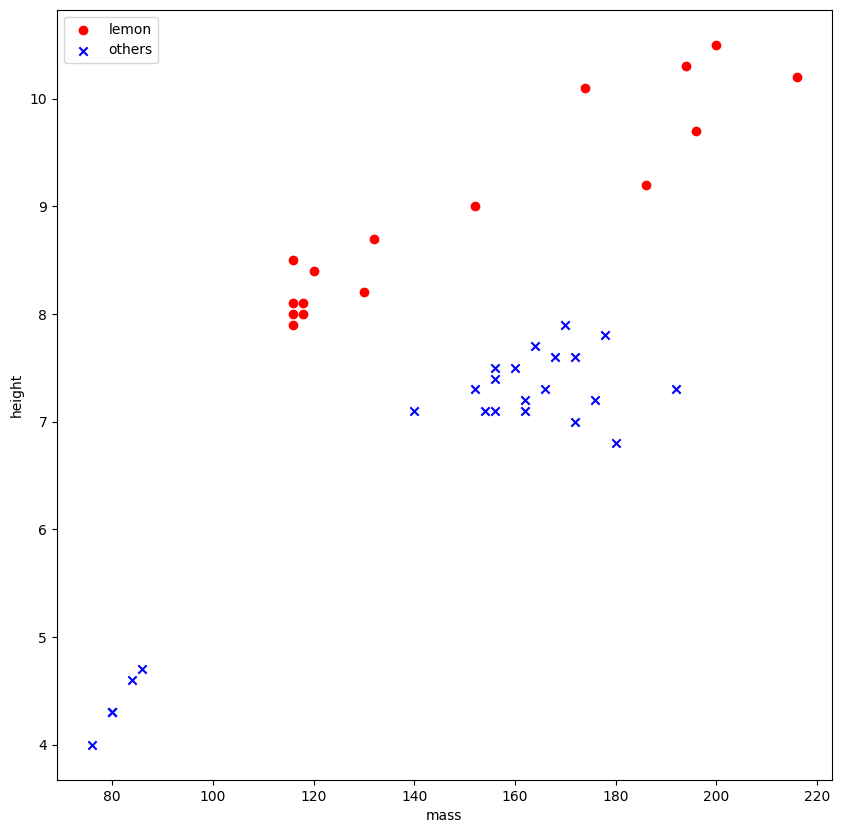

In [5]:
## 3. Draw a scatter plot of the binary classification (isLemon) by two features (mass, height).

# define feature matrix X
X = df.iloc[0:40, [1, 2]].values ## eXtract the columns of Mass length and Heigh length


# Make the plot a little larger
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

# plot data
plt.scatter(X[0: 16, 0], X[0: 16, 1],
            color='red', marker='o', label='lemon')

plt.scatter(X[16: 40, 0], X[16: 40, 1],
            color='blue', marker='x', label='others')

plt.xlabel('mass')
plt.ylabel('height')
plt.legend(loc='upper left')

plt.show()


In [6]:
import numpy as np

#define the Perceptron interface as a class
class Perceptron():
    def __init__(self, eta=0.01, n_iter=20, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        #initialize the weights
        rgen = np.random.RandomState(self.random_state)      #rgen is a NumP random number generator seeded with a user-specified random seed so that we can reproduce previous results
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # get the initial weight
        self.errors_ = []

        for _ in range(self.n_iter):  # Loop over number of iterations
            errors = 0
            for xi, target in zip(X, y):  # Loop over the samples
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return X @ self.w_
  

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [10]:
# in X1, add x0 to feature matrix X (vector with all elements as 1) that represent the bias unit - w_[0] 
m = y.size
vector_ones = np.ones(m).reshape(m, 1)

# Could also do
# vecotr_ones = np.ones_like(y)

# Could also do
# vecotr_ones = np.ones_like(y)

X1 = np.hstack([vector_ones, X])              #joining NumPy arrays by axes - stacking along rows

X1

NameError: ignored

In [ ]:
# train the perceptron algorithm on the Fruit data subset extracted
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)

ppn.fit(X1, y)

# plot the misclassification error for each epoch to check whether the algorithm converged
plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

TypeError: ignored